# 2018-02-01 Econ 101b Problem Set 5

#### Probem set will be due Wed Feb 21 at midnight...

#### Sections between Tu AM & Th AM lecture will be problem set section...

----

&nbsp;

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# ABOVE CELL IS "NO SCROLLING SUBWINDOWS" SETUP
#
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# THIS CELL LOADS THE LIBRARIES
#
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/srv/app/venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# PRETTIER GRAPHICS SETUP
#
# graphics setup: seaborn-whitegrid and figure size;
# graphs in the notebook itself...

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

In [5]:
# THIS CELL IS THE KEY TO THE OKPY.ORG AUTOGRADER SYSTEM
#
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.

!pip install -U okpy

from client.api.notebook import Notebook

ok = Notebook('ps5.ok')
_ = ok.auth(force=True, inline=True)

Requirement already up-to-date: okpy in /srv/app/venv/lib/python3.6/site-packages
Requirement already up-to-date: requests==2.12.4 in /srv/app/venv/lib/python3.6/site-packages (from okpy)
Requirement already up-to-date: coverage==3.7.1 in /srv/app/venv/lib/python3.6/site-packages (from okpy)
Assignment: PS5 Notebook
OK, version v1.14.15


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: cmtU5ge7KiyVx20Qbc3cTGbw2IpOvV
Successfully logged in as jbdelong@berkeley.edu


### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

# Problem Set 5 (Due Feb 19 11:59:59 PM)

## Programming Dos and Don'ts...

### A Running List...

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...   
&nbsp;   

2. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...   
&nbsp;

3. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be...   
&nbsp;

4. **Do** take screenshots of your error messages...   
&nbsp;

5. **Do** google your error messages: ms. google is your best friend here...   
&nbsp;

6. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...   
&nbsp;

----

&nbsp;

**(Task A) Programming Practices**

If it strikes you that anything should be added to this list of programming dos and don'ts, please email it to me at <delong@econ.berkeley.edu>

----

**(Task B) Getting a Sense of How the Solow Growth Model Behaves Via Simulation**

We start out with us giving you two functions:

    sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24,
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)

calculating and plotting levels of Solow growth model variables, and:

    log_sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)

calculating and plotting the logarithms of Solow growth model variables.
    
Required arguments are the initial level of the labor force, L0, the first argument of the function, and the initial level of the efficiency of labor, E0, the second argument of the
function.

Optional arguments are the curvature of the production function parameter alpha (or $ \alpha $), the depreciation rate delta (or $ \delta $), and the time T for which the simulation is to be run; plus:

* the value of labor force growth n for the initial balanced-growth path that the economy is on, and the value Delta_n (or $ {\Delta}n $) of the differential between the initial and the final (if we are considering a jump in n that takes place over time) or the alternative (if we are considering an alternative scenario, an alternate world, with a different value of n);   
&nbsp;

* the value of efficiency of labor growth g for the initial balanced-growth path that the economy is on, and the value Delta_g (or $ {\Delta}g $) of the differential between the initial and the final (if we are considering a jump in g that takes place over time) or the alternative (if we are considering an alternative scenario, an alternate world, with a different value of g);   
&nbsp;

* the value of the savings-investment share s for the initial balanced-growth path that the economy is on, and the value Delta_s (or $ {\Delta}s $) of the differential between the initial and the final (if we are considering a jump in s that takes place over time) or the alternative (if we are considering an alternative scenario, an alternate world, with a different value of s);   
&nbsp;

If optional arguments are not given, then they take on their default values:

* Zero for three Deltas (or $ \Delta $s), Delta_s, Delta_n, and Delta_g ($ {\Delta}s, {\Delta}n, {\Delta}g) $.
* n=0.01, g=0.02, s=0.24
* T = 100
* ($ \alpha $) alpha=0.5, ($ \delta $) delta=0.03

Check the functions, run the base cases with the two percentage point boost to annual labor force growth Delta_n = 0.02 ($ {\Delta}n = 0.02 $) and report any bugs you find.

Then go on to the descriptions and tasks further down...

In [32]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN SIMULATIONS
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its initial
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the initial and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_initial_Labor', 
        'BGP_initial_Efficiency',
        'BGP_initial_Output',
        'BGP_initial_Output_per_Worker',
        'BGP_initial_Capital_Output_Ratio',
        'BGP_initial_Capital',
        'BGP_final_Labor', 
        'BGP_final_Efficiency',
        'BGP_final_Output',
        'BGP_final_Output_per_Worker',
        'BGP_final_Capital_Output_Ratio',
        'BGP_final_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    KoverY_initial_steady_state = s/(n+g+delta)
    YoverL_initial_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_initial_steady_state = (YoverL_initial_steady_state *
        KoverY_initial_steady_state)
    sg_df.Capital[0] = KoverL_initial_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_initial_Labor[0] = L0
    sg_df.BGP_initial_Efficiency[0] = E0
    sg_df.BGP_initial_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_initial_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_initial_Output[0] = sg_df.BGP_initial_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_initial_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_final_Labor[0] = L0
    sg_df.BGP_final_Efficiency[0] = E0
    sg_df.BGP_final_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_final_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_final_Output[0] = sg_df.BGP_final_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_final_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        
        sg_df.BGP_initial_Labor[i+1] = (sg_df.BGP_initial_Labor[i] * np.exp(n))
        sg_df.BGP_initial_Efficiency[i+1] = (sg_df.BGP_initial_Efficiency[i] * np.exp(g))
        sg_df.BGP_initial_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_initial_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_initial_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_initial_Output[i+1] = (sg_df.BGP_initial_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_initial_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
        sg_df.BGP_final_Labor[i+1] = (sg_df.BGP_final_Labor[i] * np.exp(n + Delta_n))
        sg_df.BGP_final_Efficiency[i+1] = (sg_df.BGP_final_Efficiency[i] * np.exp(g + Delta_g))
        sg_df.BGP_final_Capital_Output_Ratio[i+1] = ((s + Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_final_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_final_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_final_Output[i+1] = (sg_df.BGP_final_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_final_Capital[i+1] = ((s + Delta_s) / (n + Delta_n + g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
    fig = plt.figure(figsize=(15,10))

    ax1 = plt.subplot(2,3,1)
    sg_df.BGP_initial_Labor.plot(ax = ax1, title = "BGP (Initial) Labor Force")                                       
    sg_df.BGP_final_Labor.plot(ax = ax1, title = "BGP (Final) Labor Force")
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Factors")
    plt.ylim(0, )

    ax2 = plt.subplot(2,3,2)
    sg_df.BGP_initial_Efficiency.plot(ax = ax2, title = "BGP (Initial) Efficiency")                                       
    sg_df.BGP_final_Efficiency.plot(ax = ax2, title = "BGP (Final) Efficiency")
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(2,3,3)
    sg_df.BGP_initial_Capital.plot(ax = ax3, title = "BGP (Initial) Capital Stock")
    sg_df.BGP_final_Capital.plot(ax = ax3, title = "BGP (Final) Capital Stock")
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylim(0, )

    ax4 = plt.subplot(2,3,4)
    sg_df.BGP_initial_Output.plot(ax = ax4, title = "BGP (Initial) Output")
    sg_df.BGP_final_Output.plot(ax = ax4, title = "BGP (Final) Output")
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylabel("Outcomes")
    plt.ylim(0, )

    ax5 = plt.subplot(2,3,5)
    sg_df.BGP_initial_Output_per_Worker.plot(ax = ax5, title = "BGP (Initial) Output per Worker")
    sg_df.BGP_final_Output_per_Worker.plot(ax = ax5, title = "BGP (Final) Output per Worker")
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(2,3,6)
    sg_df.BGP_initial_Capital_Output_Ratio.plot(ax = ax6, 
        title = "BGP (Initial) Capital-Output Ratio")
    sg_df.BGP_final_Capital_Output_Ratio.plot(ax = ax6, 
        title = "BGP (Final) Capital-Output Ratio")
    sg_df.Capital_Output_Ratio.plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 24)

    plt.show()
    
    print("blue is the initial parameter values-scenario balanced-growth path")
    print("orange is the final parameter values-scenario balanced growth path")
    print("green is the path of the economic variable")
    print(" ")
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

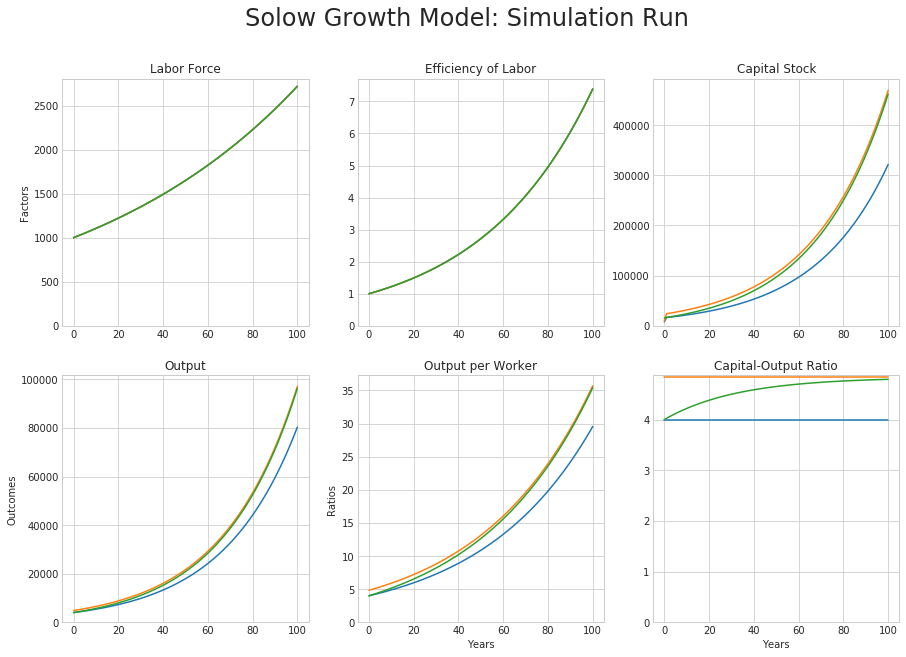

blue is the initial parameter values-scenario balanced-growth path
orange is the final parameter values-scenario balanced growth path
green is the path of the economic variable
 
0.01 is the labor force growth rate
0.02 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.29 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [38]:
# Now let's see how this works in a base case, and with the labor
# force growth rate boosted by 2% per year in the alternative case...

Delta_s = 0
Delta_g = 0
Delta_n = 0

sgm_bgp_100yr_run(L0 = 1000, E0 = 1, Delta_s = 0.05)

In [8]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LOGS OF OF SOLOW GROWTH 
# MODEL VARIABLES IN THE SIMULATIONS 
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its initial
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the initial and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def log_sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_initial_Output',
        'BGP_initial_Output_per_Worker',
        'BGP_initial_Capital_Output_Ratio',
        'BGP_initial_Capital',
        'BGP_final_Output',
        'BGP_final_Output_per_Worker',
        'BGP_final_Capital_Output_Ratio',
        'BGP_final_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    KoverY_initial_steady_state = s/(n+g+delta)
    YoverL_initial_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_initial_steady_state = (YoverL_initial_steady_state *
        KoverY_initial_steady_state)
    sg_df.Capital[0] = KoverL_initial_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_initial_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_initial_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_initial_Output[0] = sg_df.BGP_initial_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_initial_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_final_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_final_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_final_Output[0] = sg_df.BGP_final_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_final_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        
        sg_df.BGP_initial_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_initial_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_initial_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_initial_Output[i+1] = (sg_df.BGP_initial_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_initial_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
        sg_df.BGP_final_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_final_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_final_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_final_Output[i+1] = (sg_df.BGP_final_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_final_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    np.log(sg_df.Labor).plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    np.log(sg_df.Efficiency).plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    np.log(sg_df.BGP_initial_Capital).plot(ax = ax3, title = "BGP (Initial) Capital Stock")
    np.log(sg_df.BGP_final_Capital).plot(ax = ax3, title = "BGP (Final) Capital Stock")
    np.log(sg_df.Capital).plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    np.log(sg_df.BGP_initial_Output).plot(ax = ax4, title = "BGP (Initial) Output")
    np.log(sg_df.BGP_final_Output).plot(ax = ax4, title = "BGP (Final) Output")
    np.log(sg_df.Output).plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    np.log(sg_df.BGP_initial_Output_per_Worker).plot(ax = ax5, title = "BGP (Initial) Output per Worker")
    np.log(sg_df.BGP_final_Output_per_Worker).plot(ax = ax5, title = "BGP (Final) Output per Worker")
    np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    np.log(sg_df.BGP_initial_Capital_Output_Ratio).plot(ax = ax6, 
        title = "BGP (Initial) Capital-Output Ratio")
    np.log(sg_df.BGP_final_Capital_Output_Ratio).plot(ax = ax6, 
        title = "BGP (Final) Capital-Output Ratio")
    np.log(sg_df.Capital_Output_Ratio).plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

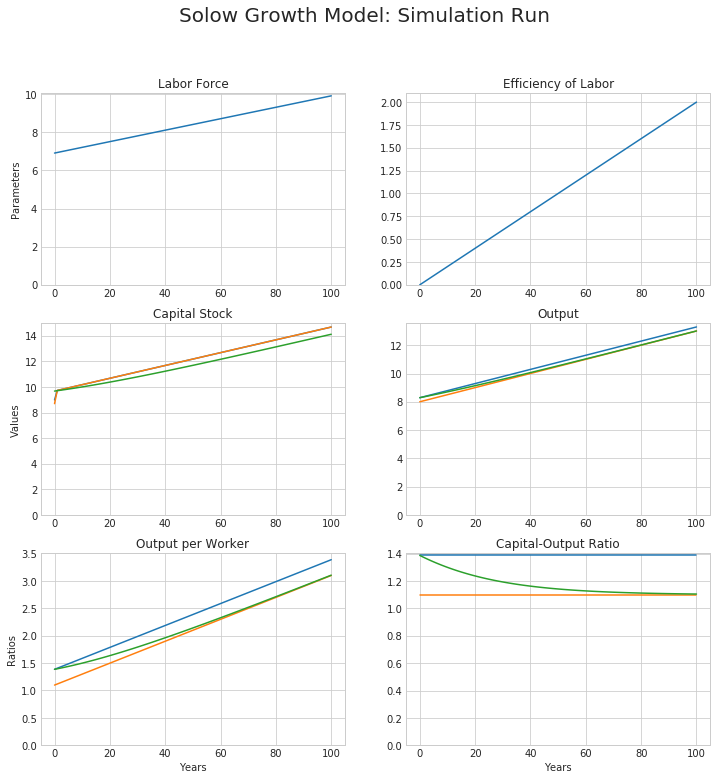

0.03 is the labor force growth rate
0.02 is the efficiency of labor growth rate
0.03 is the depreciation rate
0.24 is the savings rate
0.5 is the decreasing-returns-to-scale parameter


In [9]:
# Now let's see how this works in a base case, and with the labor
# force growth rate boosted by 2% per year in the alternative case...

log_sgm_bgp_100yr_run(L0 = 1000, E0 = 1, Delta_n = 0.02)

Now insert code cells between this markdown cell and the "# Task B answer variables" code cell. In them, run three simulations—logs and levels—in each of them, respectively, boosting one of the savings rate, the efficiency of labor growth rate, and the labor force growth rate by one percentage point over their default values in the function. 

Also calculate the values of log(K/Y) in the 50th year of the simulation for each of your three simulations. In the "# Task B answer variables" code cell, set the variables equal to their values in your three respective simulation runs. In the "Task B Answer Description" markdown cell, write two paragraphs telling us what you find out about the effects of these different changes in the economic environment on a Solow growth model economy from these simulation runs:

In [10]:
# Task B answer variables

KoverY_50_splus = __ # In the simulation run boosting the savings rate, the value of 
                     # the capital output ratio in the 50th year goes here

KoverY_50_nplus = __ # In the simulation run boosting the labor force growth rate, the
                     #  value of the capital output ratio in the 50th year goes here

KoverY_50_gplus = __ # In the simulation run boosting the efficiency of labor growth
                     # rate, the log value of the capital output ratio in the 50th year 
                     # goes here

**Task B Answer Discussion**:



In [11]:
ok.grade('q01')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
 > Suite 1 > Case 1

>>> import numpy as np
>>> np.isclose(KoverY_50_splus, 4.129, atol=0.01) and np.isclose(KoverY_50_gplus, 3.528, atol=0.01) and np.isclose(KoverY_50_nplus, 3.528, atol=0.01)
Traceback (most recent call last):
  File "/srv/app/venv/lib/python3.6/site-packages/numpy/core/numeric.py", line 2521, in isclose
    xfin = isfinite(x)
TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Run only this test case with "python3 ok -q q01 --suite 1 --c

{'passed': 0, 'failed': 1, 'locked': 0}

----

&nbsp;

**(Task C): Different Values of the Production Function Parameter $\alpha$**

Still working with our two simulation functions:

    sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24,
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)
    
and:

    log_sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)
    
Insert code cells immediately below to calculate—logs and levels—the effect in the Solow growth model, starting from our default base case balanced growth path, of a permanent six percentage point increase in the savings-investment rate s for five different values of the production function curvature parameter alpha ($\alpha$): 1/4, 1/3, 1/2, 2/3, and 3/4. 

Also calculate the values of log(K/Y) in the 50th year of the simulation for each of your  simulations. In the subsequent code cell "Task C answer variables" set the variables equal to their values in your five respective simulation runs.

In the subsequent markdown cell "Task C Answer Discussion", write two paragraphs about what these simulation runs tell you about the differences between economies in which diminishing returns to scale set in quickly (alpha low, near zero), and economies in which diminishing returns set in slowly because capital has a high weight share in the production function (alpha high, near one):

In [12]:
# Task C answer variables

KoverY_50_alphaquarter = __ # In the simulation run boosting the savings rate 
                            # with alpha=0.25, the value of the capital output
                            # ratio in the 50th year goes here

KoverY_50_alphathird = __ # In the simulation run boosting the savings rate 
                          # with alpha=1/3, the value of the capital output
                          # ratio in the 50th year goes here

KoverY_50_alphahalf = __ # In the simulation run boosting the savings rate 
                         # with alpha=0.5, the value of the capital output
                         # ratio in the 50th year goes here

KoverY_50_alphatwothirds = __ # In the simulation run boosting the savings rate 
                              # with alpha=2/3, the value of the capital output
                              # ratio in the 50th year goes here
        
KoverY_50_alphathreequarters = __ # In the simulation run boosting the savings rate 
                                  # with alpha=3/4, the value of the capital output
                                  # ratio in the 50th year goes here


**Task C Answer Discussion**:
    


In [13]:
ok.grade('q02')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Problem Set 5 q02 > Suite 1 > Case 1

>>> np.isclose(KoverY_50_alphaquarter, 4.93, atol=0.01) 
Traceback (most recent call last):
  File "/srv/app/venv/lib/python3.6/site-packages/numpy/core/numeric.py", line 2521, in isclose
    xfin = isfinite(x)
TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Error: expected
#     True
# but got
#     Traceback (most recent call last):
#       ...
#     TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

Run only this test case with "python3 ok -q q02 --suite 1 --case 1"
---------------------------------------------------------------------
Test summary
    Passe

{'passed': 0, 'failed': 1, 'locked': 0}

----

&nbsp;

**(Task D) Graphing the Production Function**

The code cell below calculates and graphs the per-worker version of the production function for alpha = 0.5, E =1. Copy and alter it to calculate the production function for alpha = 0.25, E =2, setting the output variable:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; OPW_quartertwo = output_per_worker[500, 1]. Run it. 

In the subsequent markdown cell, describe the differences between the two cases of the production function.

NameError: name 'OPW_quartertwo' is not defined

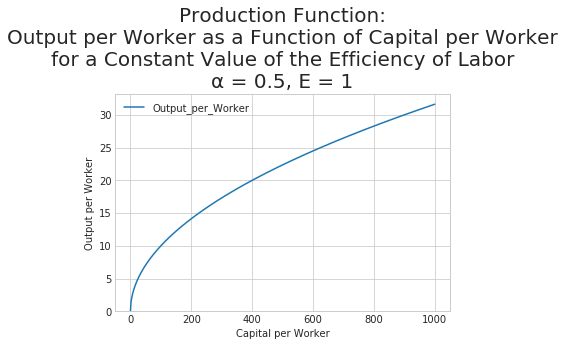

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

alpha = 0.5
E = 1

output_per_worker = np.zeros((501, 2))

for i in range(501):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + 2 * i
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E
output_per_worker_df = pd.DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

str1 = "Production Function:"
str2 = "Output per Worker as a Function of Capital per Worker"
str3 = "for a Constant Value of the Efficiency of Labor"
str4 = "α = 0.5, E = 1"
plt.title(str1 + "\n" + str2 + "\n" + str3 + "\n" + str4, size = 20)

OPW_halfone = output_per_worker[500, 1]

print("Output per worker =", OPW_quartertwo)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

alpha = 0.25
E = 2

output_per_worker = np.zeros((501, 2))

for i in range(501):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + 2 * i
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E
output_per_worker_df = pd.DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

str1 = "Production Function:"
str2 = "Output per Worker as a Function of Capital per Worker"
str3 = "for a Constant Value of the Efficiency of Labor"
str4 = "α = 0.25, E = 2"
plt.title(str1 + "\n" + str2 + "\n" + str3 + "\n" + str4, size = 20)

OPW_quartertwo = output_per_worker[500, 1]

print("Output per worker =", OPW_quartertwo)

In [ ]:
alpha = 0.25
E = 2

output_per_worker = np.zeros((501, 2))

for i in range(501):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + 2 * i
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

str1 = "Production Function:"
str2 = "Output per Worker as a Function of Capital per Worker"
str3 = "for a Constant Value of the Efficiency of Labor"
str4 = "α = 0.5, E = 1"
plt.title(str1 + "\n" + str2 + "\n" + str3 + "\n" + str4, size = 20)

OPW_quartertwo = output_per_worker[500, 1]

print("Output per worker =", OPW_quartertwo)

**Task D Answer Discussion**

In [ ]:
ok.grade('q03')

----

&nbsp;

**(Task E): Plotting the Cobb-Douglas Production Function**:

The code cell below plots output per worker for five different values of the production function parameter α, adjusting E for each curve so that the value of output per worker is 40 when the capital-output ratio is 200:

1. Run the cell.
2. Copy the code in the cell. Paste it in a new cell. Alter the code so that it plots the production function for the five different production function parameters, but with the value of output per worker equal to 200 whenever capital per worker is 800.

In [ ]:
E = 40

for a in range(5):
    output_per_worker = np.zeros((501, 2))
    alpha = 0.15 * (a + 1)
    for i in range(501):
        output_per_worker[i, 0] = 2 * i
        output_per_worker[i, 1] = ((output_per_worker[i, 0] ** alpha) * E / 
            ((200) ** alpha) )
    output_per_worker_df = DataFrame(data = output_per_worker, 
        columns = ["Capital_per_Worker", "Output_per_Worker"])

    plt.plot(output_per_worker_df.Capital_per_Worker, output_per_worker_df.Output_per_Worker)
    plt.legend(["α=0.15", "α=0.30", "α=0.45", "α=0.60", "α=0.75"])
    
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.title("Production Function for Varying α\nHolding f(200) = 40", size = 24)
plt.xlim(0, 1000)
plt.ylim(0, )

In [ ]:
ok.grade('q04')

**(Task F): Calibrating the Model to the U.S. Today**

The code cell below gives parameter values roughly calibrated to the U.S. economy today, and sets two variables—KoverYstarinitial and YoverLstarinitial—equal to the capital/output ratio and output per worker level for the U.S. today along its current balanced growth path. Copy and paste the code cell, and alter it to calculate and print two variables:

    KoverYstarfinal
    YoverLstarfinal
    
equal to their alternative balanced growth path values if the U.S. savings-investment rate had been 2.75 percentage points higher. Then add more code cells calculating new variables:

    KoverYstarinitial_F2
    YoverLstarinitial_F2
    KoverYstarfinal_F2
    YoverLstarfinal_F2

corresponding to a Solow growth model economy with alpha = 1/2 and YoverLstarinitial_F2 = 130000

In [ ]:
# in the U.S. today values are approximately:

n = 0.01
g = 0.015
delta = 0.03

sinitial = 0.22
alpha = 0.333
 
KoverYstarinitial = sinitial/(n + g + delta)

E = 65067.5831863

YoverLstarinitial = KoverYstarinitial**(alpha/(1-alpha)) * E

print(KoverYstarinitial, "= KoverYstarinitial")
print(YoverLstarinitial, "= YoverLstarinitial")

In [ ]:
ok.grade('q05')

In [ ]:
_ = ok.submit()